In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

health = pd.read_csv('health.csv')
health.head(3)

,id,weight,pulse,muscle,quarter,time
0,1,217,67,260,91,481
1,2,141,52,190,66,292
2,3,152,58,203,68,338


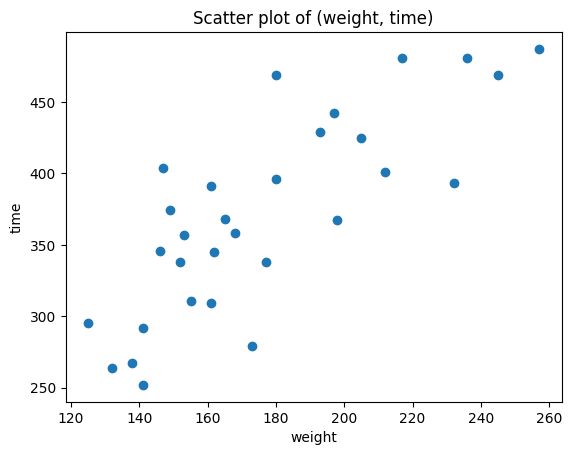

In [ ]:
# 산점도
plt.scatter(health.weight, health.time)
plt.title('Scatter plot of (weight, time)')
plt.xlabel('weight')
plt.ylabel('time')
plt.show()

In [ ]:
r = np.corrcoef(health.weight, health.time)
r

array([[1.        , 0.79809127],
       [0.79809127, 1.        ]])

In [ ]:
# 산점도 행렬
import seaborn as sns

cols = ['weight', 'pulse', 'muscle', 'quarter', 'time']
health2 = health[cols]
health2.head()

,weight,pulse,muscle,quarter,time
0,217,67,260,91,481
1,141,52,190,66,292
2,152,58,203,68,338
3,153,56,183,70,357
4,180,66,170,77,396


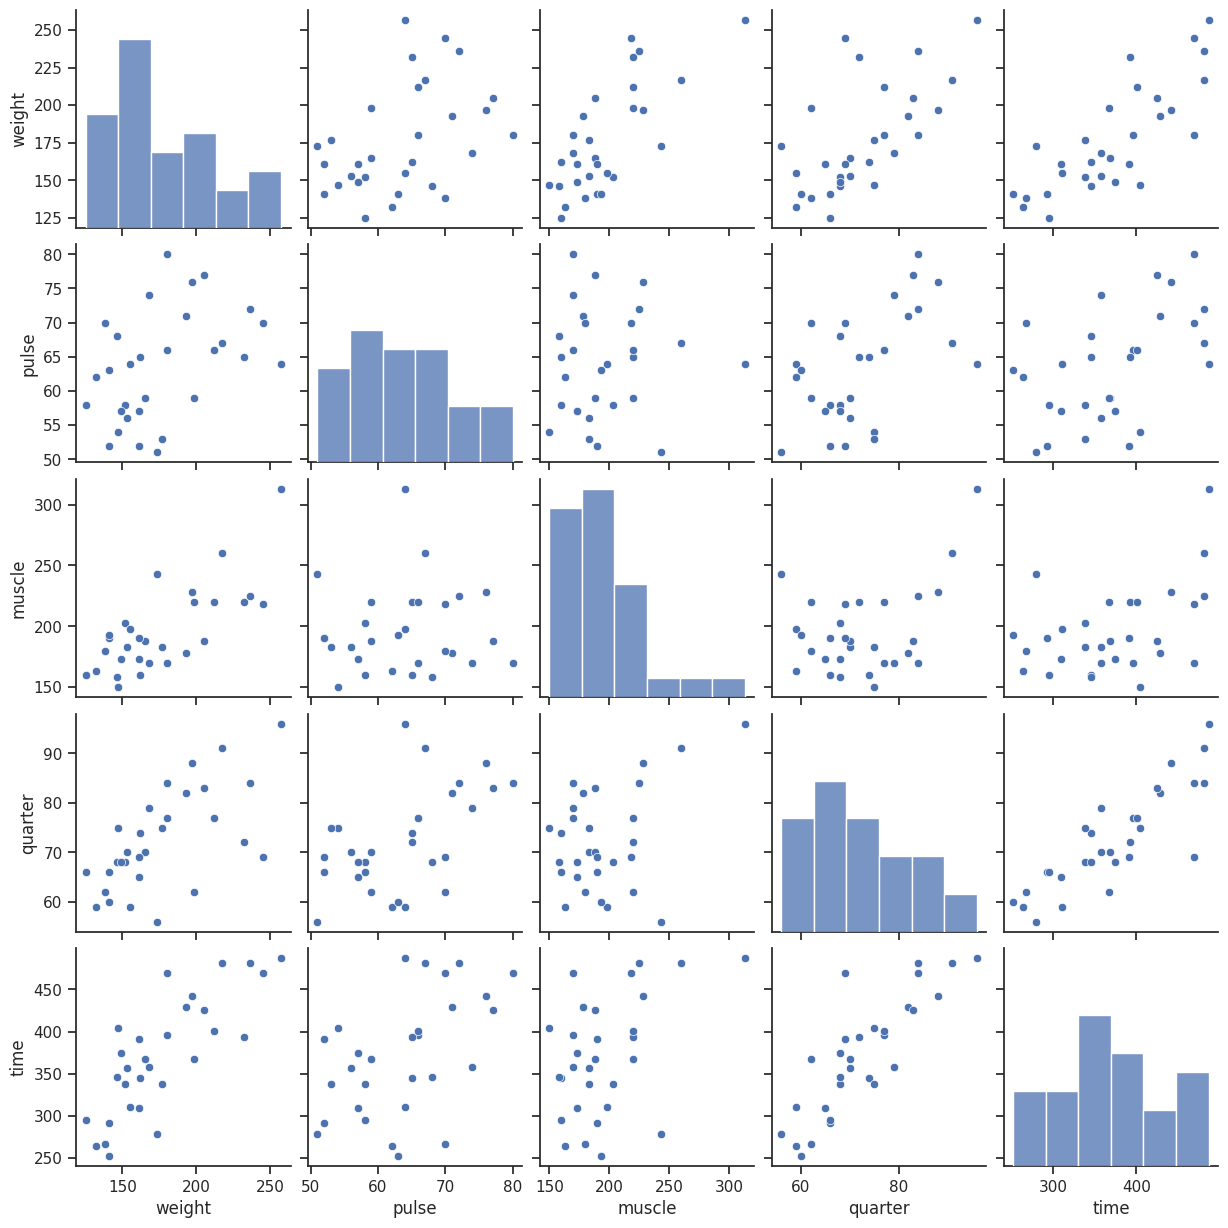

In [ ]:
sns.set(style='ticks')
sns.pairplot(health2)

In [56]:
# 회귀 분석
import statsmodels.api as sm

cols = ['weight', 'pulse', 'muscle', 'quarter']
x = health[cols]
x = sm.add_constant(x) # 상수항 추가
y = health['time']
x.head(3)

,const,weight,pulse,muscle,quarter
0,1.0,217,67,260,91
1,1.0,141,52,190,66
2,1.0,152,58,203,68


In [59]:
model = sm.OLS(y, x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     36.30
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           4.51e-10
Time:                        10:46:58   Log-Likelihood:                -140.51
No. Observations:                  30   AIC:                             291.0
Df Residuals:                      25   BIC:                             298.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6186     56.103     -0.064      0.949    -119.164     111.927
weight         1.2676      0.287      4.419      0.000       0.677       1.858
pulse         -0.5252      0.863     -0.609      0.548      -2.302       1.252
muscle        -0.5050      0.246     -2.054      0.051      -1.012       0.001
quarter        3.9030      0.748      5.220      0.000       2.363       5.443
==============================================================================
Omnibus:                        1.574   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.018
Skew:                           0.053   Prob(JB):                        0.601
Kurtosis:                       2.104   Cond. No.                     3.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
y_predict = result.predict(x) # 추정값
y_predict[0:5]

0    460.137398
1    309.451601
2    321.485067
3    341.709586
4    404.570009
dtype: float64

In [63]:
result.params # 회귀계수

const     -3.618564
weight     1.267634
pulse     -0.525206
muscle    -0.505022
quarter    3.903012
dtype: float64

In [66]:
from sklearn.linear_model import LinearRegression # 상수항 포함(default)(cf. OLS)

x2 = health[cols]
x2.head(3)

,weight,pulse,muscle,quarter
0,217,67,260,91
1,141,52,190,66
2,152,58,203,68


In [67]:
sresult = LinearRegression().fit(x2, y)
print(sresult.coef_, sresult.intercept_)

[ 1.26763358 -0.52520605 -0.50502243  3.90301223] -3.618564278627275


In [68]:
spredict = sresult.predict(x2)
spredict[0:5]

array([460.13739766, 309.45160088, 321.48506679, 341.70958559,
       404.57000898])